In [1]:
import warnings
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from intent_model.preprocessing.preprocess import read_data

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
warnings.filterwarnings('ignore')

In [3]:
PATH = 'data/dataset_v2'

data = read_data(PATH, melt_dicts=True, add_last_trip=False)

Features: 90; Sessions: 90


Reading and processing data...: 100%|███████████| 90/90 [23:07<00:00, 15.41s/it]


Removing duplicated data...
Filling missing "service_area_id"...
Done.


In [4]:
len(data)

10090847

In [5]:
data.head()

,valid_date,ts,sessionuuid,customer_id,booking_id,event_source,service_area_id,country_name,latitude,longitude,...,min_dist_to_known_loc,known_loc_occ,is_freq,dist_to_most_freq,weekday,minutes_sin,minutes_cos,rh_frac,norm_week,norm_hour
0,2023-07-02,2023-07-02 12:13:03,0000011f-5182-48be-b496-c1a50891655d,53671267,1777558859,superapp_android,1,United Arab Emirates,25.090,55.175,...,0.000000,0.804878,1,0.000000,6,-0.056693,-0.998392,0.286713,0.229039,0.558661
1,2023-05-23,2023-05-23 08:23:08,6865AEC9-13A5-4164-B861-B4239FA4CD86,56071529,1757410568,superapp_ios,1,United Arab Emirates,25.207,55.248,...,0.000000,0.888889,0,0.000000,1,0.811574,-0.584250,0.789474,0.217250,0.084819
2,2023-05-31,2023-05-31 20:57:23,0000014D-935E-4BFB-8582-6107004CCAC5,48719113,1762031191,superapp_ios,1,United Arab Emirates,25.095,55.154,...,0.000000,0.384615,1,0.090510,2,-0.716302,0.697790,0.866667,0.342997,0.615457
3,2023-05-23,2023-05-23 09:03:47,32d45eed-6a93-4a9b-8df4-34cf8a94a36f,61105461,1757431140,superapp_android,1,United Arab Emirates,25.247,55.304,...,0.001414,0.769231,1,0.001414,1,0.697790,-0.716302,1.000000,0.780869,0.384111
4,2023-08-16,2023-08-16 11:43:50,000004DB-F6BC-4050-8CD6-4ED5F2B9CA97,54629556,1799288269,superapp_ios,47,Jordan,31.996,35.858,...,0.000000,1.000000,1,0.000000,2,0.074108,-0.997250,0.823529,0.753778,0.000000


In [6]:
data.to_parquet('data/dataset_v2/dataset.pq')

In [7]:
data.columns

Index(['valid_date', 'ts', 'sessionuuid', 'customer_id', 'booking_id',
       'event_source', 'service_area_id', 'country_name', 'latitude',
       'longitude', 'is_trip_ended', 'num_trips', 'quantile', 'user_cr',
       'trx_amt', 'recom_freq', 'week_stats_recom', 'hour_stats_recom', 'rh',
       'min_dist_to_known_loc', 'known_loc_occ', 'is_freq',
       'dist_to_most_freq', 'weekday', 'minutes_sin', 'minutes_cos', 'rh_frac',
       'norm_week', 'norm_hour'],
      dtype='object')

In [8]:
sub = data[['ts']].assign(sessions=1).copy()
sub['ts'] = sub['ts'].astype(str).apply(lambda x: x.split(' ')[0])
sub = sub.groupby(by='ts').sum()

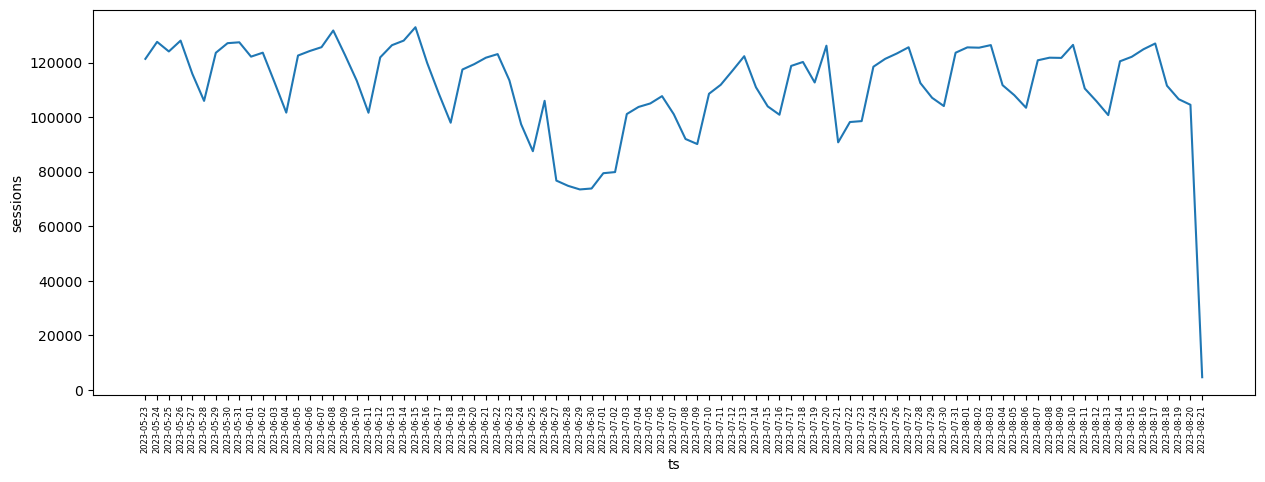

In [9]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=sub, x='ts', y='sessions')
plt.xticks(rotation=90, fontsize=6)
plt.show()